In [1]:
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
platform = pd.read_csv("../PlatformStream.csv")

In [3]:
platform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25851 entries, 0 to 25850
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      25851 non-null  int64  
 1   id              25851 non-null  object 
 2   tipo            25851 non-null  object 
 3   titulo          25851 non-null  object 
 4   director        25851 non-null  object 
 5   cartel          25851 non-null  object 
 6   pais            25849 non-null  object 
 7   año_plataforma  25851 non-null  object 
 8   año_estreno     25851 non-null  int64  
 9   clasificacion   25851 non-null  object 
 10  duracion        25851 non-null  float64
 11  argumento       25851 non-null  object 
 12  Plataforma      25851 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 2.6+ MB


In [4]:
platform.head()

,Unnamed: 0,id,tipo,titulo,director,cartel,pais,año_plataforma,año_estreno,clasificacion,duracion,argumento,Plataforma
0,0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,2021,2014,UNRATED,113.0,"Comedy, Drama",Prime_video
1,1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2021,2018,13+,110.0,"Drama, International",Prime_video
2,2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,2021,2017,UNRATED,74.0,"Action, Drama, Suspense",Prime_video
3,3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,2021,2014,UNRATED,69.0,Documentary,Prime_video
4,4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,2021,1989,UNRATED,45.0,"Drama, Fantasy",Prime_video


In [5]:
platform.drop(columns = ["Unnamed: 0"], inplace = True)

platform.duracion = platform.duracion.astype(int)

In [6]:
#Buscamos el contenido todal de las plataformas a lo largo del tiempo.
total_contenido = platform.groupby(platform.Plataforma).agg({"Plataforma":"value_counts"})

In [7]:
años_contenido = platform.groupby(["Plataforma", "año_plataforma"]).size().reset_index(name="Cantidad")

In [8]:
años_contenido.pivot_table(index='Plataforma', columns='año_plataforma', values='Cantidad', aggfunc='sum', fill_value=0)

año_plataforma,2006,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,desconocido
Plataforma,,,,,,,,,,,,,,,,
Disney_plus,0,0,0,0,0,0,0,0,0,0,0,0,924,404,416,3
Hulu,1,2,7,12,19,16,38,52,75,70,211,320,458,1000,1127,31
Netflix,0,2,2,1,17,4,13,34,106,558,1474,2038,2420,2336,1830,10
Prime_video,0,0,0,0,0,0,0,0,0,0,0,0,0,0,155,9665


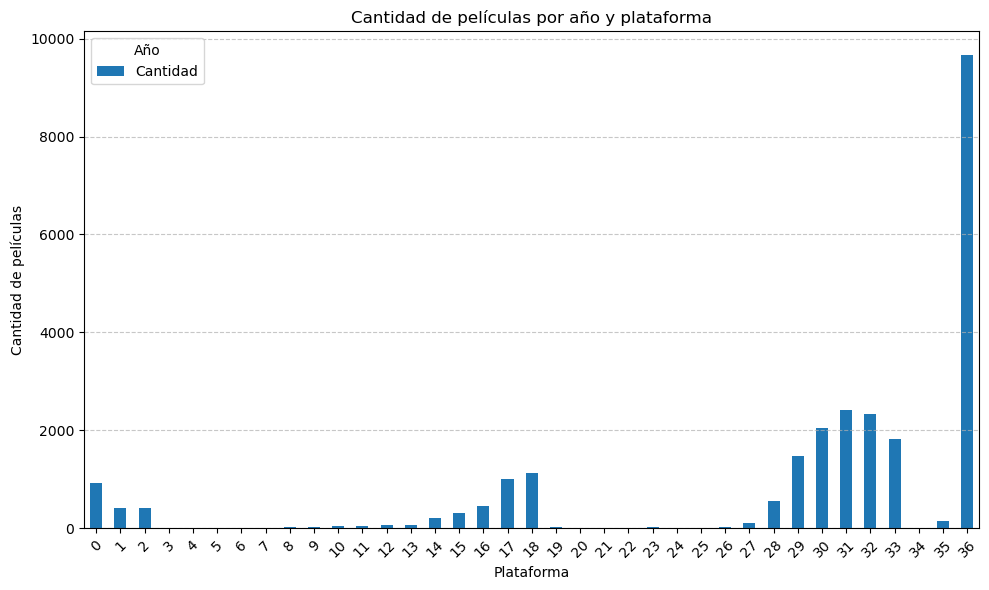

In [9]:
años_contenido.plot(kind='bar', figsize=(10, 6), stacked=True)

# Personalizamos el gráfico
plt.title('Cantidad de películas por año y plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Cantidad de películas')
plt.xticks(rotation=45)
plt.legend(title='Año')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [10]:
categoria = platform.groupby("Plataforma").agg({"tipo":"value_counts"})

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '(Disney_plus, Movie)'),
  Text(1, 0, '(Disney_plus, TV Show)'),
  Text(2, 0, '(Hulu, Movie)'),
  Text(3, 0, '(Hulu, TV Show)'),
  Text(4, 0, '(Netflix, Movie)'),
  Text(5, 0, '(Netflix, TV Show)'),
  Text(6, 0, '(Prime_video, Movie)'),
  Text(7, 0, '(Prime_video, TV Show)')])

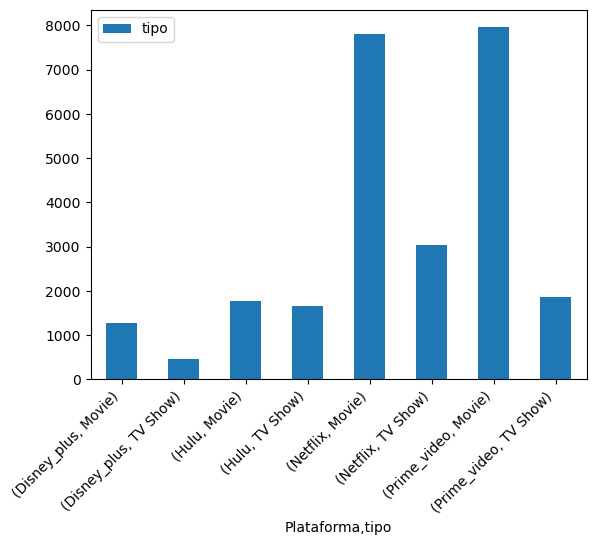

In [11]:
categoria.plot(kind="bar")
plt.xticks(rotation=45, ha="right")

In [15]:
platform.pais.unique()

dictio_pais = {"United States,":"United States","desconocido":"United States","East Germany":"Germany"}

platform.pais.replace(dictio_pais, inplace = True)

In [17]:
platform.to_csv("PowerBIuse.csv")